In [1]:
from keras.models import load_model
import pandas as pd

Using TensorFlow backend.


In [2]:
import keras.backend as K
from keras.callbacks import LearningRateScheduler
from keras.callbacks import Callback
import math
import numpy as np


def coeff_r2(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


In [13]:
# model = load_model('../tmp/FPV_ANN_tabulated_Standard.H5')
# model = load_model('../tmp/large_next.h5',custom_objects={'coeff_r2':coeff_r2})
model = load_model('../tmp/calc_100_3_3_cbrt.h5', custom_objects={'coeff_r2':coeff_r2})
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3)            0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          400         input_1[0][0]                    
__________________________________________________________________________________________________
res1a_branch2a (Dense)          (None, 300)          30300       dense_1[0][0]                    
__________________________________________________________________________________________________
res1a_branch2a_0 (Dense)        (None, 300)          30300       dense_1[0][0]                    
__________________________________________________________________________________________________
res1a_bran

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

class data_scaler(object):
    def __init__(self):
        self.norm = None
        self.norm_1 = None
        self.std = None
        self.case = None
        self.scale = 1
        self.bias = 1e-20
#         self.bias = 1


        self.switcher = {
            'min_std': 'min_std',
            'std2': 'std2',
            'std_min':'std_min',
            'min': 'min',
            'no':'no',
            'log': 'log',
            'log_min':'log_min',
            'log_std':'log_std',
            'log2': 'log2',
            'sqrt_std': 'sqrt_std',
            'cbrt_std': 'cbrt_std',
            'nrt_std':'nrt_std',
            'tan': 'tan'
        }

    def fit_transform(self, input_data, case):
        self.case = case
        if self.switcher.get(self.case) == 'min_std':
            self.norm = MinMaxScaler()
            self.std = StandardScaler()
            out = self.norm.fit_transform(input_data)
            out = self.std.fit_transform(out)

        if self.switcher.get(self.case) == 'std2':
            self.std = StandardScaler()
            out = self.std.fit_transform(input_data)

        if self.switcher.get(self.case) == 'std_min':
            self.norm = MinMaxScaler()
            self.std = StandardScaler()
            out = self.std.fit_transform(input_data)
            out = self.norm.fit_transform(out)

        if self.switcher.get(self.case) == 'min':
            self.norm = MinMaxScaler()
            out = self.norm.fit_transform(input_data)

        if self.switcher.get(self.case) == 'no':
            self.norm = MinMaxScaler()
            self.std = StandardScaler()
            out = input_data

        if self.switcher.get(self.case) == 'log_min':
            out = - np.log(np.asarray(input_data / self.scale) + self.bias)
            self.norm = MinMaxScaler()
            out = self.norm.fit_transform(out)

        if self.switcher.get(self.case) == 'log_std':
            out = - np.log(np.asarray(input_data / self.scale) + self.bias)
            self.std = StandardScaler()
            out = self.std.fit_transform(out)

        if self.switcher.get(self.case) == 'log2':
            self.norm = MinMaxScaler()
            self.std = StandardScaler()
            out = self.norm.fit_transform(input_data)
            out = np.log(np.asarray(out) + self.bias)
            out = self.std.fit_transform(out)

        if self.switcher.get(self.case) == 'sqrt_std':
            out = np.sqrt(np.asarray(input_data / self.scale))
            self.std = StandardScaler()
            out = self.std.fit_transform(out)

        if self.switcher.get(self.case) == 'cbrt_std':
            out = np.cbrt(np.asarray(input_data / self.scale))
            self.std = StandardScaler()
            out = self.std.fit_transform(out)

        if self.switcher.get(self.case) == 'nrt_std':
            out = np.power(np.asarray(input_data / self.scale),1/4)
            self.std = StandardScaler()
            out = self.std.fit_transform(out)

        if self.switcher.get(self.case) == 'tan':
            self.norm = MaxAbsScaler()
            self.std = StandardScaler()
            out = self.std.fit_transform(input_data)
            out = self.norm.fit_transform(out)
            out = np.tan(out / (2 * np.pi + self.bias))

        return out

    def transform(self, input_data):
        if self.switcher.get(self.case) == 'min_std':
            out = self.norm.transform(input_data)
            out = self.std.transform(out)

        if self.switcher.get(self.case) == 'std2':
            out = self.std.transform(input_data)

        if self.switcher.get(self.case) == 'std_min':
            out = self.std.transform(input_data)
            out = self.norm.transform(out)

        if self.switcher.get(self.case) == 'min':
            out = self.norm.transform(input_data)

        if self.switcher.get(self.case) == 'no':
            out = input_data

        if self.switcher.get(self.case) == 'log_min':
            out = - np.log(np.asarray(input_data / self.scale) + self.bias)
            out = self.norm.transform(out)

        if self.switcher.get(self.case) == 'log_std':
            out = - np.log(np.asarray(input_data / self.scale) + self.bias)
            out = self.std.transform(out)

        if self.switcher.get(self.case) == 'log2':
            out = self.norm.transform(input_data)
            out = np.log(np.asarray(out) + self.bias)
            out = self.std.transform(out)

        if self.switcher.get(self.case) == 'sqrt_std':
            out = np.sqrt(np.asarray(input_data / self.scale))
            out = self.std.transform(out)

        if self.switcher.get(self.case) == 'cbrt_std':
            out = np.cbrt(np.asarray(input_data / self.scale))
            out = self.std.transform(out)

        if self.switcher.get(self.case) == 'nrt_std':
            out = np.power(np.asarray(input_data / self.scale),1/4)
            out = self.std.transform(out)

        if self.switcher.get(self.case) == 'tan':
            out = self.std.transform(input_data)
            out = self.norm.transform(out)
            out = np.tan(out / (2 * np.pi + self.bias))

        return out

    def inverse_transform(self, input_data):

        if self.switcher.get(self.case) == 'min_std':
            out = self.std.inverse_transform(input_data)
            out = self.norm.inverse_transform(out)

        if self.switcher.get(self.case) == 'std2':
            out = self.std.inverse_transform(input_data)

        if self.switcher.get(self.case) == 'std_min':
            out = self.norm.inverse_transform(input_data)
            out = self.std.inverse_transform(out)

        if self.switcher.get(self.case) == 'min':
            out = self.norm.inverse_transform(input_data)

        if self.switcher.get(self.case) == 'no':
            out = input_data

        if self.switcher.get(self.case) == 'log_min':
            out = self.norm.inverse_transform(input_data)
            out = (np.exp(-out) - self.bias) * self.scale

        if self.switcher.get(self.case) == 'log_std':
            out = self.std.inverse_transform(input_data)
            out = (np.exp(-out) - self.bias) * self.scale

        if self.switcher.get(self.case) == 'log2':
            out = self.std.inverse_transform(input_data)
            out = np.exp(out) - self.bias
            out = self.norm.inverse_transform(out)

        if self.switcher.get(self.case) == 'sqrt_std':
            out = self.std.inverse_transform(input_data)
            out = np.power(out,2) * self.scale

        if self.switcher.get(self.case) == 'cbrt_std':
            out = self.std.inverse_transform(input_data)
            out = np.power(out,3) * self.scale

        if self.switcher.get(self.case) == 'nrt_std':
            out = self.std.inverse_transform(input_data)
            out = np.power(out,4) * self.scale

        if self.switcher.get(self.case) == 'tan':
            out = (2 * np.pi + self.bias) * np.arctan(input_data)
            out = self.norm.inverse_transform(out)
            out = self.std.inverse_transform(out)

        return out

      

def read_h5_data(fileName, input_features, labels):
    df = pd.read_hdf(fileName)
#     df = df[df['f']<0.45]
#     for i in range(5):
#         pv_101=df[df['pv']==1]
#         pv_101['pv']=pv_101['pv']+0.002*(i+1)
#         df = pd.concat([df,pv_101])
    
    input_df=df[input_features]
    in_scaler = data_scaler()
    input_np = in_scaler.fit_transform(input_df.values,'no')

    label_df=df[labels].clip(0)
#     if 'PVs' in labels:
#       label_df['PVs']=np.log(label_df['PVs']+1)
    out_scaler = data_scaler()
    label_np = out_scaler.fit_transform(label_df.values,'cbrt_std')

    return input_np, label_np, df, in_scaler, out_scaler

In [15]:
# labels = ['CH4','O2','H2O','CO','CO2','T','PVs','psi','mu','alpha']
# labels = ['T','PVs']
# labels = ['T','CH4','O2','CO2','CO','H2O','H2','OH','psi']
# labels = ['CH2OH','HNCO','CH3OH', 'CH2CHO', 'CH2O', 'C3H8', 'HNO', 'NH2', 'HCN']

# labels = np.random.choice(col_labels,20,replace=False).tolist()
# labels.append('PVs')
# labels = col_labels
labels= ['CH4', 'CH2O', 'CH3O', 'H', 'O2', 'H2', 'O', 'OH', 'H2O', 'HO2', 'H2O2', 
         'C', 'CH', 'CH2', 'CH2(S)', 'CH3', 'CO', 'CO2', 'HCO', 'CH2OH', 'CH3OH', 
         'C2H', 'C2H2', 'C2H3', 'C2H4', 'C2H5', 'C2H6', 'HCCO', 'CH2CO', 'HCCOH', 
         'N', 'NH', 'NH2', 'NH3', 'NNH', 'NO', 'NO2', 'N2O', 'HNO', 'CN', 'HCN', 
         'H2CN', 'HCNN', 'HCNO', 'HNCO', 'NCO', 'N2', 'AR', 'C3H7', 'C3H8', 'CH2CHO', 'CH3CHO', 'T', 'PVs']
labels.remove('AR')
labels.remove('N2')

print(labels)

input_features=['f','zeta','pv']

# read in the data
x_input, y_label, df, in_scaler, out_scaler = read_h5_data('../data/tables_of_fgm_psi.h5',input_features=input_features, labels = labels)

['CH4', 'CH2O', 'CH3O', 'H', 'O2', 'H2', 'O', 'OH', 'H2O', 'HO2', 'H2O2', 'C', 'CH', 'CH2', 'CH2(S)', 'CH3', 'CO', 'CO2', 'HCO', 'CH2OH', 'CH3OH', 'C2H', 'C2H2', 'C2H3', 'C2H4', 'C2H5', 'C2H6', 'HCCO', 'CH2CO', 'HCCOH', 'N', 'NH', 'NH2', 'NH3', 'NNH', 'NO', 'NO2', 'N2O', 'HNO', 'CN', 'HCN', 'H2CN', 'HCNN', 'HCNO', 'HNCO', 'NCO', 'C3H7', 'C3H8', 'CH2CHO', 'CH3CHO', 'T', 'PVs']


In [16]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_input,y_label, test_size=0.01)

x_test_df = pd.DataFrame(in_scaler.inverse_transform(x_test),columns=input_features)
y_test_df = pd.DataFrame(out_scaler.inverse_transform(y_test),columns=labels)


predict_val = model.predict(x_test,batch_size=1024*8)
# predict_val = model.predict(x_test,batch_size=1024*8)
predict_df = pd.DataFrame(out_scaler.inverse_transform(predict_val), columns=labels)

test_data=pd.concat([x_test_df,y_test_df],axis=1)
pred_data=pd.concat([x_test_df,predict_df],axis=1)

!rm sim_check.h5
test_data.to_hdf('sim_check.h5',key='test')
pred_data.to_hdf('sim_check.h5',key='pred')

df_test=pd.read_hdf('sim_check.h5',key='test')
df_pred=pd.read_hdf('sim_check.h5',key='pred')

zeta_level=list(set(df_test['zeta']))
zeta_level.sort()


res_sum=pd.DataFrame()
r2s=[]
r2s_i=[]

names=[]
maxs_0=[]
maxs_9=[]

for r2,name in zip(r2_score(df_test,df_pred,multioutput='raw_values'),df_test.columns):
  names.append(name)
  r2s.append(r2)
  maxs_0.append(df_test[df_test['zeta']==zeta_level[0]][name].max())
  maxs_9.append(df_test[df_test['zeta']==zeta_level[8]][name].max())
  for i in zeta_level:
    r2s_i.append(r2_score(df_pred[df_pred['zeta']==i][name],
                          df_test[df_test['zeta']==i][name]))

res_sum['name']=names
# res_sum['max_0']=maxs_0
# res_sum['max_9']=maxs_9
res_sum['z_scale']=[m_9/(m_0+1e-20) for m_9,m_0 in zip(maxs_9,maxs_0)]
# res_sum['r2']=r2s


tmp=np.asarray(r2s_i).reshape(-1,10)
for idx,z in enumerate(zeta_level):
  res_sum['r2s_'+str(z)]=tmp[:,idx]

res_sum[3:]

,name,z_scale,r2s_0.0,r2s_0.11,r2s_0.22,r2s_0.33,r2s_0.44,r2s_0.55,r2s_0.66,r2s_0.77,r2s_0.88,r2s_0.99
3,CH4,1.000000,0.999964,0.999963,0.999957,0.999938,0.999925,0.999906,0.999915,0.999941,0.999942,0.999955
4,CH2O,0.204099,0.999928,0.999937,0.999946,0.999926,0.999918,0.999900,0.999922,0.999924,0.999903,0.999809
5,CH3O,0.027100,0.999869,0.999924,0.999935,0.999932,0.999914,0.999842,0.999906,0.999910,0.999893,0.999657
6,H,0.028742,0.999692,0.999948,0.999901,0.999882,0.999804,0.999761,0.999864,0.999862,0.999861,0.999745
7,O2,1.000000,0.999857,0.999911,0.999908,0.999926,0.999921,0.999928,0.999949,0.999948,0.999957,0.999943
8,H2,0.166472,0.999889,0.999932,0.999885,0.999842,0.999825,0.999761,0.999855,0.999827,0.999827,0.999532
9,O,0.037097,0.999639,0.999850,0.999870,0.999848,0.999810,0.999806,0.999859,0.999844,0.999805,0.999569
10,OH,0.039923,0.999396,0.999854,0.999874,0.999876,0.999820,0.999802,0.999879,0.999878,0.999845,0.999616
11,H2O,0.223493,0.999837,0.999926,0.999923,0.999909,0.999895,0.999898,0.999949,0.999937,0.999935,0.999646
12,HO2,0.080025,0.999819,0.999917,0.999932,0.999917,0.999918,0.999898,0.999925,0.999912,0.999866,0.999775


In [7]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_input,y_label, test_size=0.01)

x_test_df = pd.DataFrame(in_scaler.inverse_transform(x_test),columns=input_features)
y_test_df = pd.DataFrame(out_scaler.inverse_transform(y_test),columns=labels)


predict_val = student_model.predict(x_test,batch_size=1024*8)
# predict_val = model.predict(x_test,batch_size=1024*8)
predict_df = pd.DataFrame(out_scaler.inverse_transform(predict_val), columns=labels)

test_data=pd.concat([x_test_df,y_test_df],axis=1)
pred_data=pd.concat([x_test_df,predict_df],axis=1)

!rm sim_check.h5
test_data.to_hdf('sim_check.h5',key='test')
pred_data.to_hdf('sim_check.h5',key='pred')

df_test=pd.read_hdf('sim_check.h5',key='test')
df_pred=pd.read_hdf('sim_check.h5',key='pred')

zeta_level=list(set(df_test['zeta']))
zeta_level.sort()


res_sum=pd.DataFrame()
r2s=[]
r2s_i=[]

names=[]
maxs_0=[]
maxs_9=[]

for r2,name in zip(r2_score(df_test,df_pred,multioutput='raw_values'),df_test.columns):
  names.append(name)
  r2s.append(r2)
  maxs_0.append(df_test[df_test['zeta']==zeta_level[0]][name].max())
  maxs_9.append(df_test[df_test['zeta']==zeta_level[8]][name].max())
  for i in zeta_level:
    r2s_i.append(r2_score(df_pred[df_pred['zeta']==i][name],
                          df_test[df_test['zeta']==i][name]))

res_sum['name']=names
# res_sum['max_0']=maxs_0
# res_sum['max_9']=maxs_9
res_sum['z_scale']=[m_9/(m_0+1e-20) for m_9,m_0 in zip(maxs_9,maxs_0)]
# res_sum['r2']=r2s


tmp=np.asarray(r2s_i).reshape(-1,10)
for idx,z in enumerate(zeta_level):
  res_sum['r2s_'+str(z)]=tmp[:,idx]

res_sum[3:]

NameError: name 'student_model' is not defined

In [6]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_input,y_label, test_size=0.01)

x_test_df = pd.DataFrame(in_scaler.inverse_transform(x_test),columns=input_features)
y_test_df = pd.DataFrame(out_scaler.inverse_transform(y_test),columns=labels)


predict_val = model.predict(x_test,batch_size=1024*8)
# predict_val = model.predict(x_test,batch_size=1024*8)
predict_df = pd.DataFrame(out_scaler.inverse_transform(predict_val), columns=labels)

test_data=pd.concat([x_test_df,y_test_df],axis=1)
pred_data=pd.concat([x_test_df,predict_df],axis=1)

!rm sim_check.h5
test_data.to_hdf('sim_check.h5',key='test')
pred_data.to_hdf('sim_check.h5',key='pred')

df_test=pd.read_hdf('sim_check.h5',key='test')
df_pred=pd.read_hdf('sim_check.h5',key='pred')

zeta_level=list(set(df_test['zeta']))
zeta_level.sort()


res_sum=pd.DataFrame()
r2s=[]
r2s_i=[]

names=[]
maxs_0=[]
maxs_9=[]

for r2,name in zip(r2_score(df_test,df_pred,multioutput='raw_values'),df_test.columns):
  names.append(name)
  r2s.append(r2)
  maxs_0.append(df_test[df_test['zeta']==zeta_level[0]][name].max())
  maxs_9.append(df_test[df_test['zeta']==zeta_level[8]][name].max())
  for i in zeta_level:
    r2s_i.append(r2_score(df_pred[df_pred['zeta']==i][name],
                          df_test[df_test['zeta']==i][name]))

res_sum['name']=names
# res_sum['max_0']=maxs_0
# res_sum['max_9']=maxs_9
res_sum['z_scale']=[m_9/(m_0+1e-20) for m_9,m_0 in zip(maxs_9,maxs_0)]
# res_sum['r2']=r2s


tmp=np.asarray(r2s_i).reshape(-1,10)
for idx,z in enumerate(zeta_level):
  res_sum['r2s_'+str(z)]=tmp[:,idx]

res_sum[3:]

,name,z_scale,r2s_0.0,r2s_0.11,r2s_0.22,r2s_0.33,r2s_0.44,r2s_0.55,r2s_0.66,r2s_0.77,r2s_0.88,r2s_0.99
3,CH4,1.000000,0.999995,0.999996,0.999996,0.999996,0.999995,0.999988,0.999992,0.999996,0.999997,0.999999
4,O2,1.000000,0.999990,0.999991,0.999993,0.999993,0.999993,0.999986,0.999992,0.999996,0.999997,0.999999
5,H2O,0.223115,0.999993,0.999995,0.999995,0.999995,0.999994,0.999988,0.999991,0.999988,0.999975,0.999117
6,CO,0.180426,0.999993,0.999995,0.999994,0.999993,0.999992,0.999978,0.999988,0.999985,0.999971,0.998528
7,CO2,0.137653,0.999983,0.999985,0.999986,0.999986,0.999983,0.999958,0.999988,0.999986,0.999974,0.999440
8,T,0.297599,0.999993,0.999995,0.999995,0.999994,0.999994,0.999986,0.999992,0.999990,0.999980,0.999239
9,PVs,0.028787,0.999995,0.999988,0.999978,0.999966,0.999893,0.999268,0.999905,0.999946,0.999916,0.998487
10,psi,1.000000,0.999978,0.999985,0.999987,0.999988,0.999989,0.999988,0.999991,0.999993,0.999994,0.999996
11,mu,0.464841,0.999993,0.999994,0.999995,0.999994,0.999994,0.999988,0.999992,0.999992,0.999984,0.999674
12,alpha,1.000000,0.999978,0.999985,0.999987,0.999988,0.999989,0.999989,0.999991,0.999993,0.999993,0.999997


In [25]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_input,y_label, test_size=0.01)

x_test_df = pd.DataFrame(in_scaler.inverse_transform(x_test),columns=input_features)
y_test_df = pd.DataFrame(out_scaler.inverse_transform(y_test),columns=labels)


predict_val = model.predict(x_test,batch_size=1024*8)
# predict_val = model.predict(x_test,batch_size=1024*8)
predict_df = pd.DataFrame(out_scaler.inverse_transform(predict_val), columns=labels)

test_data=pd.concat([x_test_df,y_test_df],axis=1)
pred_data=pd.concat([x_test_df,predict_df],axis=1)

!rm sim_check.h5
test_data.to_hdf('sim_check.h5',key='test')
pred_data.to_hdf('sim_check.h5',key='pred')

df_test=pd.read_hdf('sim_check.h5',key='test')
df_pred=pd.read_hdf('sim_check.h5',key='pred')

zeta_level=list(set(df_test['zeta']))
zeta_level.sort()


res_sum=pd.DataFrame()
r2s=[]
r2s_i=[]

names=[]
maxs_0=[]
maxs_9=[]

for r2,name in zip(r2_score(df_test,df_pred,multioutput='raw_values'),df_test.columns):
  names.append(name)
  r2s.append(r2)
  maxs_0.append(df_test[df_test['zeta']==zeta_level[0]][name].max())
  maxs_9.append(df_test[df_test['zeta']==zeta_level[8]][name].max())
  for i in zeta_level:
    r2s_i.append(r2_score(df_pred[df_pred['zeta']==i][name],
                          df_test[df_test['zeta']==i][name]))

res_sum['name']=names
# res_sum['max_0']=maxs_0
# res_sum['max_9']=maxs_9
res_sum['z_scale']=[m_9/(m_0+1e-20) for m_9,m_0 in zip(maxs_9,maxs_0)]
# res_sum['r2']=r2s


tmp=np.asarray(r2s_i).reshape(-1,10)
for idx,z in enumerate(zeta_level):
  res_sum['r2s_'+str(z)]=tmp[:,idx]

res_sum[3:]

,name,z_scale,r2s_0.0,r2s_0.11,r2s_0.22,r2s_0.33,r2s_0.44,r2s_0.55,r2s_0.66,r2s_0.77,r2s_0.88,r2s_0.99
3,CH4,1.000000,0.999994,0.999995,0.999995,0.999995,0.999994,0.999976,0.999987,0.999993,0.999993,0.999997
4,O2,1.000000,0.999986,0.999985,0.999989,0.999990,0.999991,0.999973,0.999987,0.999992,0.999993,0.999995
5,H2O,0.224176,0.999979,0.999988,0.999988,0.999986,0.999985,0.999973,0.999970,0.999954,0.999895,0.995601
6,CO,0.183326,0.999950,0.999978,0.999974,0.999979,0.999975,0.999945,0.999950,0.999923,0.999782,0.992715
7,CO2,0.140610,0.999516,0.999846,0.999863,0.999872,0.999897,0.999755,0.999804,0.999669,0.999442,0.984304
8,T,0.318095,0.999942,0.999972,0.999976,0.999976,0.999975,0.999946,0.999955,0.999938,0.999848,0.993675
9,PVs,0.030814,0.999574,0.998306,0.998408,0.997965,0.997493,0.985927,0.993063,0.988779,0.983162,0.811177
10,psi,1.000000,0.999849,0.999948,0.999947,0.999962,0.999971,0.999967,0.999974,0.999976,0.999976,0.999977
11,mu,0.483033,0.999956,0.999981,0.999982,0.999981,0.999983,0.999965,0.999977,0.999967,0.999919,0.998479
12,alpha,1.000000,0.999852,0.999952,0.999952,0.999963,0.999970,0.999969,0.999975,0.999977,0.999976,0.999982


In [7]:
#@title import plotly
import plotly.plotly as py
import numpy as np
from plotly.offline import init_notebook_mode, iplot
# from plotly.graph_objs import Contours, Histogram2dContour, Marker, Scatter
import plotly.graph_objs as go

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [17]:
#@title Default title text
# species = np.random.choice(labels)
species = 'PVs' #@param {type:"string"}
z_level =  5 #@param {type:"integer"}

# configure_plotly_browser_state()
# init_notebook_mode(connected=False)

from sklearn.metrics import r2_score


df_t=df_test[df_test['zeta']==zeta_level[z_level]].sample(frac=1)
# df_p=df_pred.loc[df_pred['zeta']==zeta_level[1]].sample(frac=0.1)
df_p=df_pred.loc[df_t.index]
# error=(df_p[species]-df_t[species])
error=(df_p[species]-df_t[species])/(df_p[species]+df_t[species])
r2=round(r2_score(df_p[species],df_t[species]),4)

print(species,'r2:',r2,'max:',df_t[species].max())

fig_db = {
    'data': [       
        {'name':'test data from table',
         'x': df_t['f'],
         'y': df_t['pv'],
         'z': df_t[species],
         'type':'scatter3d', 
        'mode': 'markers',
          'marker':{
              'size':1
          }
        },
        {'name':'prediction from neural networks',
         'x': df_p['f'],
         'y': df_p['pv'],
         'z': df_p[species],
         'type':'scatter3d', 
        'mode': 'markers',
          'marker':{
              'size':1
          },
        },
        {'name':'error in difference',
         'x': df_p['f'],
         'y': df_p['pv'],
         'z': error,
         'type':'scatter3d', 
         'mode': 'markers',
          'marker':{
              'size':1
          },
         }       
    ],
    'layout': {
        'scene':{
            'xaxis': {'title':'mixture fraction'},
            'yaxis': {'title':'progress variable'},
            'zaxis': {'title': species+'_r2:'+str(r2)}
                 }
    }
}
# iplot(fig_db, filename='multiple-scatter')
iplot(fig_db)


PVs r2: 0.9999 max: 1794.78


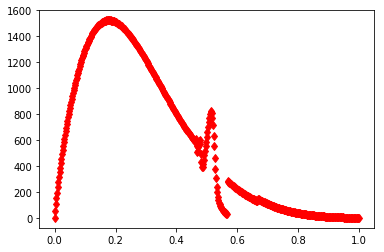

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
z=0.55
sp='PVs'
plt.plot(df[(df.pv==1)&(df.zeta==z)]['f'],df[(df.pv==0.9)&(df.zeta==z)][sp],'rd')

In [23]:
from keras.models import Model
from keras.layers import Dense, Input, Dropout



n_neuron = 100
# %%
print('set up student network')
# ANN parameters
dim_input = x_train.shape[1]
dim_label = y_train.shape[1]

batch_norm = False

# This returns a tensor
inputs = Input(shape=(dim_input,),name='input_1')

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(n_neuron, activation='relu')(inputs)
x = Dense(n_neuron, activation='relu')(x)
x = Dense(n_neuron, activation='relu')(x)
# x = Dropout(0.1)(x)
predictions = Dense(dim_label, activation='linear', name='output_1')(x)

student_model = Model(inputs=inputs, outputs=predictions)
student_model.summary()

set up student network
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
output_1 (Dense)             (None, 10)                1010      
Total params: 21,610
Trainable params: 21,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
import keras.backend as K
from keras.callbacks import LearningRateScheduler
import math

def cubic_loss(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred)*K.abs(y_true - y_pred), axis=-1)

def coeff_r2(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

  
def step_decay(epoch):
   initial_lrate = 0.002
   drop = 0.5
   epochs_drop = 1000.0
   lrate = initial_lrate * math.pow(drop,math.floor((1+epoch)/epochs_drop))
   return lrate
  
lrate = LearningRateScheduler(step_decay)

class SGDRScheduler(Callback):
    '''Cosine annealing learning rate scheduler with periodic restarts.
    # Usage
        ```python
            schedule = SGDRScheduler(min_lr=1e-5,
                                     max_lr=1e-2,
                                     steps_per_epoch=np.ceil(epoch_size/batch_size),
                                     lr_decay=0.9,
                                     cycle_length=5,
                                     mult_factor=1.5)
            model.fit(X_train, Y_train, epochs=100, callbacks=[schedule])
        ```
    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`.
        lr_decay: Reduce the max_lr after the completion of each cycle.
                  Ex. To reduce the max_lr by 20% after each cycle, set this value to 0.8.
        cycle_length: Initial number of epochs in a cycle.
        mult_factor: Scale epochs_to_restart after each full cycle completion.
    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: http://arxiv.org/abs/1608.03983
    '''
    def __init__(self,
                 min_lr,
                 max_lr,
                 steps_per_epoch,
                 lr_decay=1,
                 cycle_length=10,
                 mult_factor=2):

        self.min_lr = min_lr
        self.max_lr = max_lr
        self.lr_decay = lr_decay

        self.batch_since_restart = 0
        self.next_restart = cycle_length

        self.steps_per_epoch = steps_per_epoch

        self.cycle_length = cycle_length
        self.mult_factor = mult_factor

        self.history = {}

    def clr(self):
        '''Calculate the learning rate.'''
        fraction_to_restart = self.batch_since_restart / (self.steps_per_epoch * self.cycle_length)
        lr = self.min_lr + 0.5 * (self.max_lr - self.min_lr) * (1 + np.cos(fraction_to_restart * np.pi))
        return lr

    def on_train_begin(self, logs={}):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.max_lr)

    def on_batch_end(self, batch, logs={}):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)

        self.batch_since_restart += 1
        K.set_value(self.model.optimizer.lr, self.clr())

    def on_epoch_end(self, epoch, logs={}):
        '''Check for end of current cycle, apply restarts when necessary.'''
        if epoch + 1 == self.next_restart:
            self.batch_since_restart = 0
            self.cycle_length = np.ceil(self.cycle_length * self.mult_factor)
            self.next_restart += self.cycle_length
            self.max_lr *= self.lr_decay
            self.best_weights = self.model.get_weights()

    def on_train_end(self, logs={}):
        '''Set weights to the values from the end of the most recent cycle for best performance.'''
        self.model.set_weights(self.best_weights)

In [26]:
student_model = load_model('student.h5',custom_objects={'coeff_r2':coeff_r2})

In [13]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3)            0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 900)          3600        input_1[0][0]                    
__________________________________________________________________________________________________
res1a_branch2a (Dense)          (None, 900)          810900      dense_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 900)          0           res1a_branch2a[0][0]             
__________________________________________________________________________________________________
res1a_bran

In [9]:
gx,gy,gz=np.mgrid[0:1:600j,0:1:10j,0:1:600j]
gx=gx.reshape(-1,1)
gy=gy.reshape(-1,1)
gz=gz.reshape(-1,1)
gm=np.hstack([gx,gy,gz])
gm.shape

(3600000, 3)

In [36]:
from keras.callbacks import ModelCheckpoint
from keras import optimizers
batch_size = 1024*16
epochs = 2000
vsplit = 0.1

loss_type='mse'

adam_op = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-8, decay=0.0, amsgrad=False)

student_model.compile(loss=loss_type,
#                       optimizer=adam_op,
                      optimizer='adam',
                      metrics=[coeff_r2])
# model.compile(loss=cubic_loss, optimizer=adam_op, metrics=['accuracy'])

# checkpoint (save the best model based validate loss)
!mkdir ./tmp
filepath = "./tmp/student_weights.best.cntk.hdf5"

checkpoint = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min',
                             period=20)

epoch_size=x_train.shape[0]
a=0
base=2
clc=2
for i in range(5):
  a+=base*clc**(i)
print(a)
epochs,c_len = a,base
schedule = SGDRScheduler(min_lr=1e-5,max_lr=1e-4,
                         steps_per_epoch=np.ceil(epoch_size/batch_size),
                         cycle_length=c_len,lr_decay=0.8,mult_factor=2)

callbacks_list = [checkpoint]
# callbacks_list = [checkpoint, schedule]

x_train_teacher = in_scaler.transform(gm)
y_train_teacher = model.predict(x_train_teacher, batch_size=1024*8)
x_train, x_test, y_train, y_test = train_test_split(x_train_teacher,y_train_teacher, test_size=0.01)
# fit the model
history = student_model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=vsplit,
    verbose=2,
    callbacks=callbacks_list,
    shuffle=True)

mkdir: cannot create directory ‘./tmp’: File exists
62
Train on 3207600 samples, validate on 356400 samples
Epoch 1/62
 - 4s - loss: 1.5372e-04 - coeff_r2: 0.9998 - val_loss: 7.0398e-05 - val_coeff_r2: 0.9999
Epoch 2/62
 - 2s - loss: 7.1192e-05 - coeff_r2: 0.9999 - val_loss: 6.9974e-05 - val_coeff_r2: 0.9999
Epoch 3/62
 - 2s - loss: 7.3368e-05 - coeff_r2: 0.9999 - val_loss: 7.0930e-05 - val_coeff_r2: 0.9999
Epoch 4/62
 - 2s - loss: 7.6598e-05 - coeff_r2: 0.9999 - val_loss: 7.6345e-05 - val_coeff_r2: 0.9999
Epoch 5/62
 - 2s - loss: 7.8491e-05 - coeff_r2: 0.9999 - val_loss: 8.4268e-05 - val_coeff_r2: 0.9999
Epoch 6/62
 - 2s - loss: 7.6528e-05 - coeff_r2: 0.9999 - val_loss: 8.0171e-05 - val_coeff_r2: 0.9999
Epoch 7/62
 - 2s - loss: 7.8521e-05 - coeff_r2: 0.9999 - val_loss: 8.1167e-05 - val_coeff_r2: 0.9999
Epoch 8/62
 - 2s - loss: 7.9864e-05 - coeff_r2: 0.9999 - val_loss: 8.6915e-05 - val_coeff_r2: 0.9999
Epoch 9/62
 - 2s - loss: 8.4223e-05 - coeff_r2: 0.9999 - val_loss: 9.6007e-05 - val_

In [39]:
student_model.save('student_100_3.h5')

In [22]:
n_res = 501
pv_level = 0.996
f_1 = np.linspace(0,1,n_res)
z_1 = np.zeros(n_res)
pv_1 = np.ones(n_res)*pv_level
case_1 = np.vstack((f_1,z_1,pv_1))
# case_1 = np.vstack((pv_1,z_1,f_1))

case_1 = case_1.T
case_1.shape

(501, 3)

In [23]:
out=out_scaler.inverse_transform(model.predict(case_1))
out=pd.DataFrame(out,columns=labels)
sp='PVs'
out.head()

,CH4,O2,H2O,CO,CO2,T,PVs,psi,mu,alpha
0,-4.657913e-07,0.236895,-8.894838e-09,-5.629384e-08,1.191589e-08,299.126465,0.357136,0.011592,0.000018,0.000012
1,1.363579e-06,0.225694,4.472311e-03,7.254475e-05,5.132813e-03,385.113831,0.550195,0.008996,0.000023,0.000009
2,7.026879e-07,0.215498,8.496866e-03,1.583289e-04,1.067833e-02,466.032257,1.369625,0.007415,0.000026,0.000007
3,1.606503e-06,0.205213,1.293162e-02,2.512379e-04,1.602193e-02,551.731995,1.427688,0.006261,0.000030,0.000006
4,2.427723e-06,0.196394,1.718562e-02,2.994192e-04,2.101947e-02,637.010010,1.655576,0.005454,0.000033,0.000005


In [24]:
table_val=df[(df.pv==pv_level) & (df.zeta==0)][sp]
table_val.shape

(501,)

<function matplotlib.pyplot.show(*args, **kw)>

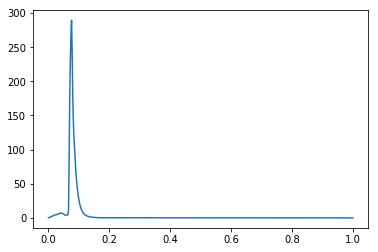

In [25]:
import matplotlib.pyplot as plt
plt.plot(f_1,table_val)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

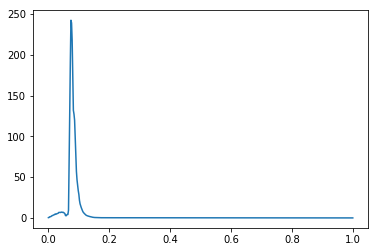

In [26]:
plt.plot(f_1,out[sp])
plt.show

In [27]:
df.head()

,zeta,f,pv,C2H3,C2H6,CH2,H2CN,C2H4,H2O2,C2H,...,CH2O,C3H8,HNO,NH2,HCN,H,N,H2O,HCCOH,HCNN
0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [201]:
pv_101=df[df['pv']==1][df['zeta']==0]

/home/eg/anaconda3/envs/my_dev/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [202]:
pv_101['pv']=pv_101['pv']+0.01

In [204]:
a=pd.concat([pv_101,pv_101])

In [205]:
pv_101.shape

(501, 61)

In [206]:
a.shape

(1002, 61)

In [207]:
a

,zeta,f,pv,C2H3,C2H6,CH2,H2CN,C2H4,H2O2,C2H,...,CH2O,C3H8,HNO,NH2,HCN,H,N,H2O,HCCOH,HCNN
2505000,0.0,0.000,1.01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
2505001,0.0,0.002,1.01,8.436570e-25,0.000000e+00,1.573110e-21,1.041870e-24,2.584680e-23,2.159630e-10,5.490900e-21,...,2.902970e-18,1.588320e-38,5.371620e-16,4.061870e-15,6.098830e-14,1.053440e-12,1.051560e-18,0.004475,4.195130e-12,4.170610e-28
2505002,0.0,0.004,1.01,1.687310e-24,0.000000e+00,3.146210e-21,2.083730e-24,5.169360e-23,4.319260e-10,1.098180e-20,...,5.805930e-18,3.176630e-38,1.074320e-15,8.123750e-15,1.219770e-13,2.106890e-12,2.103110e-18,0.008950,8.390250e-12,8.341210e-28
2505003,0.0,0.006,1.01,2.530970e-24,0.000000e+00,4.719320e-21,3.125600e-24,7.754050e-23,6.478890e-10,1.647270e-20,...,8.708900e-18,4.764950e-38,1.611490e-15,1.218560e-14,1.829650e-13,3.160330e-12,3.154670e-18,0.013425,1.258540e-11,1.251180e-27
2505004,0.0,0.008,1.01,3.374630e-24,0.000000e+00,6.292430e-21,4.167460e-24,1.033870e-22,8.638520e-10,2.196360e-20,...,1.161190e-17,6.353270e-38,2.148650e-15,1.624750e-14,2.439530e-13,4.213770e-12,4.206220e-18,0.017900,1.678050e-11,1.668240e-27
2505005,0.0,0.010,1.01,4.218290e-24,0.000000e+00,7.865530e-21,5.209330e-24,1.292340e-22,1.079820e-09,2.745450e-20,...,1.451480e-17,7.941580e-38,2.685810e-15,2.030940e-14,3.049410e-13,5.267220e-12,5.257780e-18,0.022375,2.097560e-11,2.085300e-27
2505006,0.0,0.012,1.01,5.061940e-24,0.000000e+00,9.438640e-21,6.251200e-24,1.550810e-22,1.295780e-09,3.294540e-20,...,1.741780e-17,9.529900e-38,3.222970e-15,2.437120e-14,3.659300e-13,6.320660e-12,6.309330e-18,0.026850,2.517080e-11,2.502360e-27
2505007,0.0,0.014,1.01,5.905600e-24,0.000000e+00,1.101170e-20,7.293060e-24,1.809280e-22,1.511740e-09,3.843630e-20,...,2.032080e-17,1.111820e-37,3.760130e-15,2.843310e-14,4.269180e-13,7.374100e-12,7.360890e-18,0.031325,2.936590e-11,2.919420e-27
2505008,0.0,0.016,1.01,6.749260e-24,0.000000e+00,1.258490e-20,8.334930e-24,2.067750e-22,1.727700e-09,4.392720e-20,...,2.322370e-17,1.270650e-37,4.297290e-15,3.249500e-14,4.879060e-13,8.427550e-12,8.412440e-18,0.035800,3.356100e-11,3.336490e-27
2505009,0.0,0.018,1.01,7.592920e-24,0.000000e+00,1.415800e-20,9.376790e-24,2.326210e-22,1.943670e-09,4.941810e-20,...,2.612670e-17,1.429480e-37,4.834460e-15,3.655690e-14,5.488950e-13,9.480990e-12,9.464000e-18,0.040275,3.775610e-11,3.753550e-27
